# Imports

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import ctypes
import random

# Cas de tests, rendu 2

## Régression

### Linear Simple 2D :
        Linear Model : OK
        MLP (1, 1)   : OK

In [12]:
import matplotlib.pyplot as plt
import numpy as np
import ctypes
import random
my_lib = ctypes.CDLL(r"..\rust_lib\target\debug\rust_lib.dll")


In [13]:
X = np.array([
      [1],
      [2]
],dtype=ctypes.c_float)
Y = np.array([
      [2],
      [3]
],dtype=ctypes.c_float)

In [14]:
nombre_colonnes_x = len(X[0])
nombre_lignex_x = len(X)
nombre_colonnes_y = len(Y[0])
nombre_lignes_y = len(Y)
X_flat = X.flatten()
Y_flat = Y.flatten()

In [15]:
LP_c_float = ctypes.POINTER(ctypes.c_float)
x_to_predict = (ctypes.c_float * len(X_flat))(*X_flat)
x_to_predict_ptr = ctypes.cast(x_to_predict, LP_c_float)
LP_c_float = ctypes.POINTER(ctypes.c_float)
y_to_predict = (ctypes.c_float * len(Y_flat))(*Y_flat)
y_to_predict_ptr = ctypes.cast(y_to_predict, LP_c_float)

In [16]:
layers = np.array([1, 1], dtype=ctypes.c_float)
LP_c_float = ctypes.POINTER(ctypes.c_float)
layers_pmc = (ctypes.c_float * len(layers))(*layers)
layers_ptr_pmc = ctypes.cast(layers_pmc, LP_c_float)

print(layers_pmc)
number_of_layers = len(layers_pmc)
print(layers)

[1. 1.]


In [17]:
my_lib.generate_random_mpl_w.argtypes = [ctypes.POINTER(ctypes.c_float), ctypes.c_int32]
my_lib.generate_random_mpl_w.restype = ctypes.POINTER(ctypes.c_float)

w_array_ptr = my_lib.generate_random_mpl_w(layers_ptr_pmc, number_of_layers)
w_array = np.ctypeslib.as_array(w_array_ptr, ((2,)))
print(w_array)

[-0.8229017  -0.19107652]


In [18]:
my_lib.multi_layer_perceptron_training.argtypes = [
    ctypes.POINTER(ctypes.c_float),
    ctypes.POINTER(ctypes.c_float),
    ctypes.POINTER(ctypes.c_float),
    ctypes.c_int32,
    ctypes.c_int32,
    ctypes.c_int32,
    ctypes.c_float,
    ctypes.c_int32,
    ctypes.POINTER(ctypes.c_float),
    ctypes.c_int32,
    ctypes.c_bool,
]
my_lib.multi_layer_perceptron_training.restype = ctypes.POINTER(ctypes.c_float)

In [19]:
pmc_trained_model_ptr = my_lib.multi_layer_perceptron_training(
      w_array_ptr,
      y_to_predict_ptr,
      x_to_predict_ptr,
      len(X), # number of inputs
      len(X[0]), # dimension of inputs
      1, # number of classes to predict
      0.1, # learning rate
      10000, # epochs
      layers_ptr_pmc, # pointeur vers la forme de pmc
      number_of_layers, # number of layers
      False,
)

pmc_trained_model = np.ctypeslib.as_array(pmc_trained_model_ptr,(2,))
print(pmc_trained_model)

[0.9999981 1.0000011]


In [22]:
my_lib.multi_layer_perceptron_predict.argtypes = [
    ctypes.POINTER(ctypes.c_float),
    ctypes.POINTER(ctypes.c_float),
    ctypes.c_int32,
    ctypes.c_int32,
    ctypes.c_int32,
    ctypes.POINTER(ctypes.c_float),
    ctypes.c_int32,
    ctypes.c_bool,
]

my_lib.multi_layer_perceptron_predict.restype = ctypes.POINTER(ctypes.c_float)

In [25]:
X_to_predict = []

for i in range(10000) :
    x_1 = random.random()*2 + 1
    # x_2 = random.random()*2 + 1
    X_to_predict.append([x_1])

X_to_predict = np.array(X_to_predict, dtype=ctypes.c_float)
X_to_predict_flat = X_to_predict.flatten()

LP_c_float = ctypes.POINTER(ctypes.c_float)
x_to_predict_mlp = (ctypes.c_float * len(X_to_predict_flat))(*X_to_predict_flat)
x_to_predict_ptr_mlp = ctypes.cast(x_to_predict_mlp, LP_c_float)

pmc_predict_ptr = my_lib.multi_layer_perceptron_predict(
    pmc_trained_model_ptr, # pointeur vers le modele entrainé
    x_to_predict_ptr_mlp, # pointeur vers le dataset à prédire
    len(X_to_predict), # nombre d'éléments du dataset
    len(X_to_predict[0]), # dimension des éléments du dataset
    1, # number of classes to predict
    layers_ptr_pmc, # pointeur vers la forme de pmc
    number_of_layers, # number of layers
    False, # is classification
)

pmc_predict_model = np.ctypeslib.as_array(pmc_predict_ptr,(1*len(X_to_predict),))
print(pmc_predict_model)

[2.928407  3.8614588 3.7556872 ... 3.1936553 2.6461372 2.9619045]


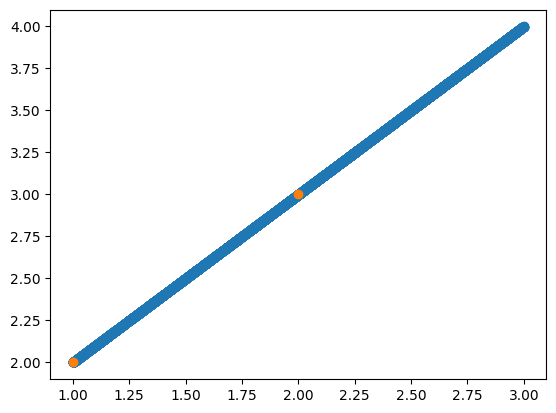

<Figure size 640x480 with 0 Axes>

In [28]:
# x = np.linspace(0, 3, 100)
#
# y = pmc_trained_model[1] * x + pmc_trained_model[0]

# plt.plot(x, y)
plt.scatter(X_to_predict,pmc_predict_model)
plt.scatter(X,Y)
plt.show()
plt.clf()

### Non Linear Simple 2D :
        Linear Model    : OK
        MLP (1, ?, 1)   : OK

In [29]:
import matplotlib.pyplot as plt
import numpy as np
import ctypes
import random
my_lib = ctypes.CDLL(r"..\rust_lib\target\debug\rust_lib.dll")

layers = np.array([1, 16, 1], dtype=ctypes.c_float)
LP_c_float = ctypes.POINTER(ctypes.c_float)
layers_pmc = (ctypes.c_float * len(layers))(*layers)
layers_ptr_pmc = ctypes.cast(layers_pmc, LP_c_float)

print(layers_pmc)
number_of_layers = len(layers_pmc)
print(layers)

[ 1. 16.  1.]


In [30]:
X = np.array([
      [1],
      [2],
      [3]
],dtype=ctypes.c_float)
Y = np.array([
      [2],
      [3],
      [2.5]
],dtype=ctypes.c_float)

In [31]:
nombre_colonnes_x = len(X[0])
nombre_lignex_x = len(X)
nombre_colonnes_y = len(Y[0])
nombre_lignes_y = len(Y)
X_flat = X.flatten()
Y_flat = Y.flatten()
LP_c_float = ctypes.POINTER(ctypes.c_float)
x_to_predict = (ctypes.c_float * len(X_flat))(*X_flat)
x_to_predict_ptr = ctypes.cast(x_to_predict, LP_c_float)
LP_c_float = ctypes.POINTER(ctypes.c_float)
y_to_predict = (ctypes.c_float * len(Y_flat))(*Y_flat)
y_to_predict_ptr = ctypes.cast(y_to_predict, LP_c_float)

In [32]:
my_lib.generate_random_mpl_w.argtypes = [ctypes.POINTER(ctypes.c_float), ctypes.c_int32]
my_lib.generate_random_mpl_w.restype = ctypes.POINTER(ctypes.c_float)

w_array_ptr = my_lib.generate_random_mpl_w(layers_ptr_pmc, number_of_layers)
w_array = np.ctypeslib.as_array(w_array_ptr, ((2*16+17,)))
print(w_array)

[ 0.6927295  -0.45150948 -0.12832046  0.00428271  0.02524281 -0.7156286
 -0.12136483 -0.07835007 -0.44993496 -0.98092246 -0.81782436  0.4653268
 -0.6560514  -0.48814893  0.30274105 -0.3410015   0.93521595  0.49384832
  0.24654675 -0.20334482 -0.10763359 -0.09486556  0.46038318 -0.6802907
 -0.3590269  -0.72814226 -0.47829437 -0.183635   -0.35580516  0.7270839
  0.8396058   0.714484   -0.7863157   0.56763124  0.3318963  -0.88398886
 -0.4087863  -0.8804107  -0.71345925  0.60177183  0.2989192  -0.6082642
  0.81789637 -0.45280075  0.62294126 -0.1740346  -0.22216511  0.8777654
 -0.19671774]


In [33]:
my_lib.multi_layer_perceptron_training.argtypes = [
    ctypes.POINTER(ctypes.c_float),
    ctypes.POINTER(ctypes.c_float),
    ctypes.POINTER(ctypes.c_float),
    ctypes.c_int32,
    ctypes.c_int32,
    ctypes.c_int32,
    ctypes.c_float,
    ctypes.c_int32,
    ctypes.POINTER(ctypes.c_float),
    ctypes.c_int32,
    ctypes.c_bool,
]
my_lib.multi_layer_perceptron_training.restype = ctypes.POINTER(ctypes.c_float)
pmc_trained_model_ptr = my_lib.multi_layer_perceptron_training(
    w_array_ptr,
    y_to_predict_ptr,
    x_to_predict_ptr,
    len(X),  # number of inputs
    len(X[0]),  # dimension of inputs
    1,  # number of classes to predict
    0.1,  # learning rate
    10000,  # epochs
    layers_ptr_pmc,  # pointeur vers la forme de pmc
    number_of_layers,  # number of layers
    False,
)

pmc_trained_model = np.ctypeslib.as_array(pmc_trained_model_ptr, (2*16+17,))
print(pmc_trained_model)

[ 0.4250923  -0.69823223 -0.3675956   0.05570689  0.2334209  -0.7601053
 -0.6591664   0.18009222 -0.27020004 -1.0772934  -0.6881897   0.8442815
 -0.5139249  -0.9710093  -0.5279323  -0.7209142   0.84507483  1.0418855
  0.31126502 -0.14820299 -0.8911931  -0.43968695  1.0484326  -0.26232067
 -0.70167786 -0.64152724 -0.56919914 -0.42349336 -0.17399938  0.46005505
  1.0093428   0.38845068 -0.94575524  0.6041077   0.67099017 -0.49446446
  0.14436747 -0.81299114 -0.41861328  0.9641202   0.35719737 -0.55698335
  0.8891688  -0.3734321   0.5460138   0.07952859 -0.58931327  1.222071
 -0.47538224]


In [34]:
my_lib.multi_layer_perceptron_predict.argtypes = [
    ctypes.POINTER(ctypes.c_float),
    ctypes.POINTER(ctypes.c_float),
    ctypes.c_int32,
    ctypes.c_int32,
    ctypes.c_int32,
    ctypes.POINTER(ctypes.c_float),
    ctypes.c_int32,
    ctypes.c_bool,
]

my_lib.multi_layer_perceptron_predict.restype = ctypes.POINTER(ctypes.c_float)
X_to_predict = []

for i in range(10000):
    x_1 = random.uniform(1.0,3.0)
    # x_2 = random.random()*2 + 1
    X_to_predict.append([x_1])

X_to_predict = np.array(X_to_predict, dtype=ctypes.c_float)
X_to_predict_flat = X_to_predict.flatten()

LP_c_float = ctypes.POINTER(ctypes.c_float)
x_to_predict_mlp = (ctypes.c_float * len(X_to_predict_flat))(*X_to_predict_flat)
x_to_predict_ptr_mlp = ctypes.cast(x_to_predict_mlp, LP_c_float)

pmc_predict_ptr = my_lib.multi_layer_perceptron_predict(
    pmc_trained_model_ptr,  # pointeur vers le modele entrainé
    x_to_predict_ptr_mlp,  # pointeur vers le dataset à prédire
    len(X_to_predict),  # nombre d'éléments du dataset
    len(X_to_predict[0]),  # dimension des éléments du dataset
    1,  # number of classes to predict
    layers_ptr_pmc,  # pointeur vers la forme de pmc
    number_of_layers,  # number of layers
    False,  # is classification
)

pmc_predict_model = np.ctypeslib.as_array(pmc_predict_ptr, (1 * len(X_to_predict),))
print(pmc_predict_model)

[2.9971457 2.8091059 2.9628325 ... 2.8048053 2.7426755 2.8289337]


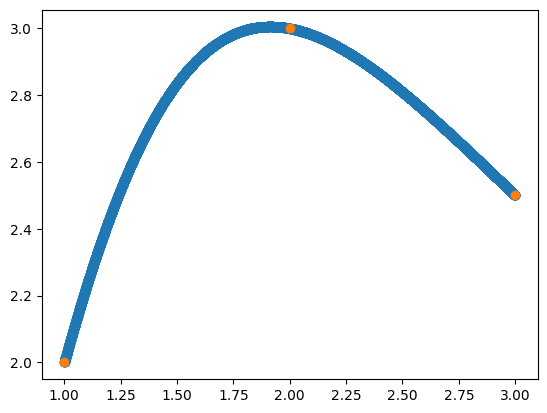

<Figure size 640x480 with 0 Axes>

In [35]:
plt.scatter(X_to_predict,pmc_predict_model)
plt.scatter(X,Y)
plt.show()
plt.clf()

### Linear Simple 3D :
        Linear Model    : OK
        MLP (2, 1)      : OK

In [36]:
import matplotlib.pyplot as plt
import numpy as np
import ctypes
import random
my_lib = ctypes.CDLL(r"..\rust_lib\target\debug\rust_lib.dll")

layers = np.array([2, 1], dtype=ctypes.c_float)
LP_c_float = ctypes.POINTER(ctypes.c_float)
layers_pmc = (ctypes.c_float * len(layers))(*layers)
layers_ptr_pmc = ctypes.cast(layers_pmc, LP_c_float)

print(layers_pmc)
number_of_layers = len(layers_pmc)
print(layers)

[2. 1.]


In [37]:
X = np.array([
      [1, 1],
      [2, 2],
      [3, 1]
],dtype=ctypes.c_float)
Y = np.array([
      [2],
      [3],
      [2.5]
],dtype=ctypes.c_float)

In [38]:
nombre_colonnes_x = len(X[0])
nombre_lignex_x = len(X)
nombre_colonnes_y = len(Y[0])
nombre_lignes_y = len(Y)
X_flat = X.flatten()
Y_flat = Y.flatten()
LP_c_float = ctypes.POINTER(ctypes.c_float)
x_to_predict = (ctypes.c_float * len(X_flat))(*X_flat)
x_to_predict_ptr = ctypes.cast(x_to_predict, LP_c_float)
LP_c_float = ctypes.POINTER(ctypes.c_float)
y_to_predict = (ctypes.c_float * len(Y_flat))(*Y_flat)
y_to_predict_ptr = ctypes.cast(y_to_predict, LP_c_float)
my_lib.generate_random_mpl_w.argtypes = [ctypes.POINTER(ctypes.c_float), ctypes.c_int32]
my_lib.generate_random_mpl_w.restype = ctypes.POINTER(ctypes.c_float)

w_array_ptr = my_lib.generate_random_mpl_w(layers_ptr_pmc, number_of_layers)
w_array = np.ctypeslib.as_array(w_array_ptr, ((3,)))
print(w_array)

[ 0.9925113  -0.8272085   0.48818707]


In [39]:
my_lib.multi_layer_perceptron_training.argtypes = [
    ctypes.POINTER(ctypes.c_float),
    ctypes.POINTER(ctypes.c_float),
    ctypes.POINTER(ctypes.c_float),
    ctypes.c_int32,
    ctypes.c_int32,
    ctypes.c_int32,
    ctypes.c_float,
    ctypes.c_int32,
    ctypes.POINTER(ctypes.c_float),
    ctypes.c_int32,
    ctypes.c_bool,
]
my_lib.multi_layer_perceptron_training.restype = ctypes.POINTER(ctypes.c_float)
pmc_trained_model_ptr = my_lib.multi_layer_perceptron_training(
    w_array_ptr,
    y_to_predict_ptr,
    x_to_predict_ptr,
    len(X),  # number of inputs
    len(X[0]),  # dimension of inputs
    1,  # number of classes to predict
    0.1,  # learning rate
    1000,  # epochs
    layers_ptr_pmc,  # pointeur vers la forme de pmc
    number_of_layers,  # number of layers
    False,
)

pmc_trained_model = np.ctypeslib.as_array(pmc_trained_model_ptr, (3,))
print(pmc_trained_model)

[1.0000011  0.24999975 0.7499995 ]


In [40]:
my_lib.multi_layer_perceptron_predict.argtypes = [
    ctypes.POINTER(ctypes.c_float),
    ctypes.POINTER(ctypes.c_float),
    ctypes.c_int32,
    ctypes.c_int32,
    ctypes.c_int32,
    ctypes.POINTER(ctypes.c_float),
    ctypes.c_int32,
    ctypes.c_bool,
]

my_lib.multi_layer_perceptron_predict.restype = ctypes.POINTER(ctypes.c_float)
X_to_predict = []

for i in range(10000):
    x_1 = random.uniform(1.0,3.0)
    x_2 = random.uniform(1.0,3.0)
    X_to_predict.append([x_1,x_2])

X_to_predict = np.array(X_to_predict, dtype=ctypes.c_float)
X_to_predict_flat = X_to_predict.flatten()

LP_c_float = ctypes.POINTER(ctypes.c_float)
x_to_predict_mlp = (ctypes.c_float * len(X_to_predict_flat))(*X_to_predict_flat)
x_to_predict_ptr_mlp = ctypes.cast(x_to_predict_mlp, LP_c_float)

pmc_predict_ptr = my_lib.multi_layer_perceptron_predict(
    pmc_trained_model_ptr,  # pointeur vers le modele entrainé
    x_to_predict_ptr_mlp,  # pointeur vers le dataset à prédire
    len(X_to_predict),  # nombre d'éléments du dataset
    len(X_to_predict[0]),  # dimension des éléments du dataset
    1,  # number of classes to predict
    layers_ptr_pmc,  # pointeur vers la forme de pmc
    number_of_layers,  # number of layers
    False,  # is classification
)

pmc_predict_model = np.ctypeslib.as_array(pmc_predict_ptr, (1 * len(X_to_predict),))
print(pmc_predict_model)

[3.089373  3.5752902 2.6645637 ... 3.5712152 3.2450871 2.2023277]


In [24]:
print(X[:,0])
print(X[:,1])

[1 2 3]
[1 2 1]


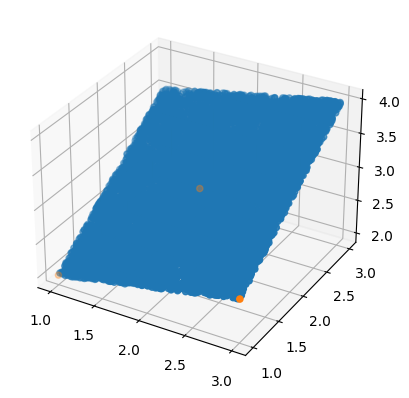

In [44]:
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
# ax = Axes3D(fig)
ax.scatter(X_to_predict[:,0],X_to_predict[:,1],pmc_predict_model)
ax.scatter(X[:,0],X[:,1],Y)
plt.show()
# plt.clf()

### Linear Tricky 3D :
        Linear Model    : OK
        MLP (2, 1)      : OK

In [45]:
import matplotlib.pyplot as plt
import numpy as np
import ctypes
import random
my_lib = ctypes.CDLL(r"..\rust_lib\target\debug\rust_lib.dll")

layers = np.array([2, 1], dtype=ctypes.c_float)
LP_c_float = ctypes.POINTER(ctypes.c_float)
layers_pmc = (ctypes.c_float * len(layers))(*layers)
layers_ptr_pmc = ctypes.cast(layers_pmc, LP_c_float)

print(layers_pmc)
number_of_layers = len(layers_pmc)
print(layers)

[2. 1.]


In [46]:
X = np.array([
      [1, 1],
      [2, 2],
      [3, 3]
],dtype=ctypes.c_float)
Y = np.array([
      [1],
      [2],
      [3]
],dtype=ctypes.c_float)

In [47]:
nombre_colonnes_x = len(X[0])
nombre_lignex_x = len(X)
nombre_colonnes_y = len(Y[0])
nombre_lignes_y = len(Y)
X_flat = X.flatten()
Y_flat = Y.flatten()
LP_c_float = ctypes.POINTER(ctypes.c_float)
x_to_predict = (ctypes.c_float * len(X_flat))(*X_flat)
x_to_predict_ptr = ctypes.cast(x_to_predict, LP_c_float)
LP_c_float = ctypes.POINTER(ctypes.c_float)
y_to_predict = (ctypes.c_float * len(Y_flat))(*Y_flat)
y_to_predict_ptr = ctypes.cast(y_to_predict, LP_c_float)
my_lib.generate_random_mpl_w.argtypes = [ctypes.POINTER(ctypes.c_float), ctypes.c_int32]
my_lib.generate_random_mpl_w.restype = ctypes.POINTER(ctypes.c_float)

w_array_ptr = my_lib.generate_random_mpl_w(layers_ptr_pmc, number_of_layers)
w_array = np.ctypeslib.as_array(w_array_ptr, ((3,)))
print(w_array)

[ 0.939131    0.80819607 -0.39877176]


In [48]:
my_lib.multi_layer_perceptron_training.argtypes = [
    ctypes.POINTER(ctypes.c_float),
    ctypes.POINTER(ctypes.c_float),
    ctypes.POINTER(ctypes.c_float),
    ctypes.c_int32,
    ctypes.c_int32,
    ctypes.c_int32,
    ctypes.c_float,
    ctypes.c_int32,
    ctypes.POINTER(ctypes.c_float),
    ctypes.c_int32,
    ctypes.c_bool,
]
my_lib.multi_layer_perceptron_training.restype = ctypes.POINTER(ctypes.c_float)
pmc_trained_model_ptr = my_lib.multi_layer_perceptron_training(
    w_array_ptr,
    y_to_predict_ptr,
    x_to_predict_ptr,
    len(X),  # number of inputs
    len(X[0]),  # dimension of inputs
    1,  # number of classes to predict
    0.1,  # learning rate
    1000,  # epochs
    layers_ptr_pmc,  # pointeur vers la forme de pmc
    number_of_layers,  # number of layers
    False,
)

pmc_trained_model = np.ctypeslib.as_array(pmc_trained_model_ptr, (3,))
print(pmc_trained_model)

[ 1.70196245e-07  1.10348475e+00 -1.03484824e-01]


In [55]:
my_lib.multi_layer_perceptron_predict.argtypes = [
    ctypes.POINTER(ctypes.c_float),
    ctypes.POINTER(ctypes.c_float),
    ctypes.c_int32,
    ctypes.c_int32,
    ctypes.c_int32,
    ctypes.POINTER(ctypes.c_float),
    ctypes.c_int32,
    ctypes.c_bool,
]

my_lib.multi_layer_perceptron_predict.restype = ctypes.POINTER(ctypes.c_float)
X_to_predict = []

for i in range(100):
    x_1 = random.uniform(1.0,3.0)
    x_2 = random.uniform(1.0,3.0)
    X_to_predict.append([x_1,x_2])

X_to_predict = np.array(X_to_predict, dtype=ctypes.c_float)
X_to_predict_flat = X_to_predict.flatten()

LP_c_float = ctypes.POINTER(ctypes.c_float)
x_to_predict_mlp = (ctypes.c_float * len(X_to_predict_flat))(*X_to_predict_flat)
x_to_predict_ptr_mlp = ctypes.cast(x_to_predict_mlp, LP_c_float)

pmc_predict_ptr = my_lib.multi_layer_perceptron_predict(
    pmc_trained_model_ptr,  # pointeur vers le modele entrainé
    x_to_predict_ptr_mlp,  # pointeur vers le dataset à prédire
    len(X_to_predict),  # nombre d'éléments du dataset
    len(X_to_predict[0]),  # dimension des éléments du dataset
    1,  # number of classes to predict
    layers_ptr_pmc,  # pointeur vers la forme de pmc
    number_of_layers,  # number of layers
    False,  # is classification
)

pmc_predict_model = np.ctypeslib.as_array(pmc_predict_ptr, (1 * len(X_to_predict),))
print(pmc_predict_model)

[2.2624755  1.5900569  2.8802793  2.0859659  2.5230126  0.9997667
 2.900844   1.8666964  1.3880781  2.1964471  1.5601598  1.7988479
 1.521852   1.570774   2.7793648  2.294265   2.8781967  2.1568182
 1.5487165  2.5954351  1.4348202  2.8153548  2.0374908  2.9577808
 1.2869735  2.776529   0.99099374 1.0634128  2.0262558  3.0181024
 1.804533   2.0073516  1.5621465  1.3936641  2.3904984  1.563473
 3.0189621  1.297767   2.6730366  1.1000059  0.8867807  2.2098908
 2.659761   2.5132532  1.0003988  1.100273   2.0981014  1.6415403
 2.7604122  1.5519348  2.9461586  1.4673678  1.8212284  1.8197114
 1.4257088  2.8744617  1.8436544  2.0455565  1.3536656  1.2898115
 2.5473342  0.97613084 1.3681486  1.1308709  1.3220035  0.8132725
 1.5919075  1.7812     1.6644392  2.439683   1.341248   2.259739
 2.067091   2.8295639  0.97486633 2.46436    0.9907894  2.5052958
 1.6147046  1.4110414  3.0772865  2.581901   2.2098804  2.4288259
 2.0480585  2.490728   2.6243327  1.870723   2.7991223  2.7390792
 1.2365255  

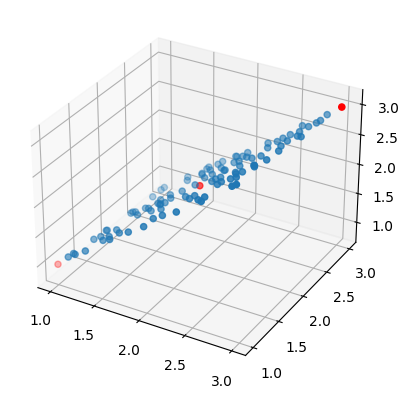

In [56]:
# from mpl_toolkits.mplot3d import Axes3D
# fig = plt.figure()
# ax = Axes3D(fig)
# ax.scatter(X[:,0],X[:,1],Y)
# plt.show()
# plt.clf()

from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
# ax = Axes3D(fig)
ax.scatter(X_to_predict[:,0],X_to_predict[:,1],pmc_predict_model)
ax.scatter(X[:,0],X[:,1],Y,c='red')
plt.show()
# plt.clf()


### Non Linear Simple 3D :
        Linear Model       : KO
        MLP (2, 2, 1)      : OK

In [57]:
import matplotlib.pyplot as plt
import numpy as np
import ctypes
import random
my_lib = ctypes.CDLL(r"..\rust_lib\target\debug\rust_lib.dll")

layers = np.array([2, 2, 1], dtype=ctypes.c_float)
LP_c_float = ctypes.POINTER(ctypes.c_float)
layers_pmc = (ctypes.c_float * len(layers))(*layers)
layers_ptr_pmc = ctypes.cast(layers_pmc, LP_c_float)

print(layers_pmc)
number_of_layers = len(layers_pmc)
print(layers)

[2. 2. 1.]


In [58]:
X = np.array([
      [1, 0],
      [0, 1],
      [1, 1],
      [0, 0],
],dtype=ctypes.c_float)
Y = np.array([
      [2],
      [1],
      [-2],
      [-1]
],dtype=ctypes.c_float)

In [59]:
nombre_colonnes_x = len(X[0])
nombre_lignex_x = len(X)
nombre_colonnes_y = len(Y[0])
nombre_lignes_y = len(Y)
X_flat = X.flatten()
Y_flat = Y.flatten()
LP_c_float = ctypes.POINTER(ctypes.c_float)
x_to_predict = (ctypes.c_float * len(X_flat))(*X_flat)
x_to_predict_ptr = ctypes.cast(x_to_predict, LP_c_float)
LP_c_float = ctypes.POINTER(ctypes.c_float)
y_to_predict = (ctypes.c_float * len(Y_flat))(*Y_flat)
y_to_predict_ptr = ctypes.cast(y_to_predict, LP_c_float)
my_lib.generate_random_mpl_w.argtypes = [ctypes.POINTER(ctypes.c_float), ctypes.c_int32]
my_lib.generate_random_mpl_w.restype = ctypes.POINTER(ctypes.c_float)

w_array_ptr = my_lib.generate_random_mpl_w(layers_ptr_pmc, number_of_layers)
w_array = np.ctypeslib.as_array(w_array_ptr, ((9,)))
print(w_array)

[ 0.8325038   0.19813466 -0.84287    -0.16631794  0.6706655  -0.3858869
 -0.233675    0.23726106 -0.65248156]


In [60]:
my_lib.multi_layer_perceptron_training.argtypes = [
    ctypes.POINTER(ctypes.c_float),
    ctypes.POINTER(ctypes.c_float),
    ctypes.POINTER(ctypes.c_float),
    ctypes.c_int32,
    ctypes.c_int32,
    ctypes.c_int32,
    ctypes.c_float,
    ctypes.c_int32,
    ctypes.POINTER(ctypes.c_float),
    ctypes.c_int32,
    ctypes.c_bool,
]
my_lib.multi_layer_perceptron_training.restype = ctypes.POINTER(ctypes.c_float)
pmc_trained_model_ptr = my_lib.multi_layer_perceptron_training(
    w_array_ptr,
    y_to_predict_ptr,
    x_to_predict_ptr,
    len(X),  # number of inputs
    len(X[0]),  # dimension of inputs
    1,  # number of classes to predict
    0.1,  # learning rate
    1000,  # epochs
    layers_ptr_pmc,  # pointeur vers la forme de pmc
    number_of_layers,  # number of layers
    False,
)

pmc_trained_model = np.ctypeslib.as_array(pmc_trained_model_ptr, (9,))
print(pmc_trained_model)

[ 1.3645551 -0.3621831 -2.6294363 -1.9644278  2.9099958  1.3277533
  1.931582  -2.506946   2.1083226]


In [67]:
my_lib.multi_layer_perceptron_predict.argtypes = [
    ctypes.POINTER(ctypes.c_float),
    ctypes.POINTER(ctypes.c_float),
    ctypes.c_int32,
    ctypes.c_int32,
    ctypes.c_int32,
    ctypes.POINTER(ctypes.c_float),
    ctypes.c_int32,
    ctypes.c_bool,
]

my_lib.multi_layer_perceptron_predict.restype = ctypes.POINTER(ctypes.c_float)
X_to_predict = []

for i in range(10000):
    x_1 = random.uniform(0.0,1.0)
    x_2 = random.uniform(0.0,1.0)
    X_to_predict.append([x_1,x_2])

X_to_predict = np.array(X_to_predict, dtype=ctypes.c_float)
X_to_predict_flat = X_to_predict.flatten()

LP_c_float = ctypes.POINTER(ctypes.c_float)
x_to_predict_mlp = (ctypes.c_float * len(X_to_predict_flat))(*X_to_predict_flat)
x_to_predict_ptr_mlp = ctypes.cast(x_to_predict_mlp, LP_c_float)

pmc_predict_ptr = my_lib.multi_layer_perceptron_predict(
    pmc_trained_model_ptr,  # pointeur vers le modele entrainé
    x_to_predict_ptr_mlp,  # pointeur vers le dataset à prédire
    len(X_to_predict),  # nombre d'éléments du dataset
    len(X_to_predict[0]),  # dimension des éléments du dataset
    1,  # number of classes to predict
    layers_ptr_pmc,  # pointeur vers la forme de pmc
    number_of_layers,  # number of layers
    False,  # is classification
)

pmc_predict_model = np.ctypeslib.as_array(pmc_predict_ptr, (1 * len(X_to_predict),))
print(pmc_predict_model)

[-1.1045809 -0.688022  -1.6369804 ... -1.4814852 -1.6181339 -1.572268 ]


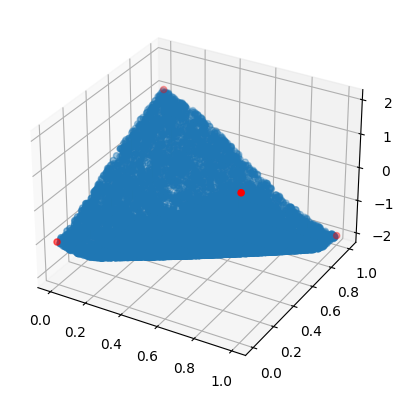

In [68]:
# from mpl_toolkits.mplot3d import Axes3D
# fig = plt.figure()
# ax = Axes3D(fig)
# ax.scatter(X[:,0],X[:,1],Y)
# plt.show()
# plt.clf()
# from mpl_toolkits.mplot3d import Axes3D
# fig = plt.figure()
# ax = Axes3D(fig)
# ax.scatter(X[:,0],X[:,1],Y)
# plt.show()
# plt.clf()

from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
# ax = Axes3D(fig)
ax.scatter(X_to_predict[:,0],X_to_predict[:,1],pmc_predict_model)
ax.scatter(X[:,0],X[:,1],Y,c='red')
plt.show()
# plt.clf()